In [14]:
import pandas as pd
import numpy as np

url = 'https://oedi-data-lake.s3.amazonaws.com/nrel-pds-building-stock/end-use-load-profiles-for-us-building-stock/2024/resstock_dataset_2024.1/resstock_tmy3/metadata_and_annual_results/by_state/state=AL/parquet/Baseline/AL_baseline_metadata_and_annual_results.parquet'

df = pd.read_parquet(url)

df

,upgrade,weight,applicability,in.sqft,in.ahs_region,in.aiannh_area,in.area_median_income,in.ashrae_iecc_climate_zone_2004,in.ashrae_iecc_climate_zone_2004_2_a_split,in.bathroom_spot_vent_hour,...,out.emissions.fuel_oil.lrmer_high_re_cost_2030_boxavg.co2e_kg,out.bills.natural_gas.usd,out.bills.propane.usd,out.bills.fuel_oil.usd,out.bills.electricity.usd,out.bills.all_fuels.usd,out.energy_burden.percentage,out.emissions.all_fuels.lrmer_high_re_cost_2030_boxavg.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_2030_boxavg.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_2030_boxavg.co2e_kg
bldg_id,,,,,,,,,,,,,,,,,,,,,
5,0,63.075295,True,3310.0,Non-CBSA East South Central,No,Not Available,2A,"2A - FL, GA, AL, MS",Hour22,...,0.0,0.00,0.00,0.0,2035.52,2035.52,NaN,6314.155476,4148.183870,6314.155476
21,0,63.075295,True,881.0,Non-CBSA East South Central,Yes,100-120%,3A,3A,Hour0,...,0.0,0.00,0.00,0.0,1260.16,1260.16,2.66,3704.529709,2576.821967,3704.529709
44,0,63.075295,True,3310.0,Non-CBSA East South Central,No,Not Available,3A,3A,Hour1,...,0.0,0.00,0.00,0.0,1145.87,1145.87,NaN,3274.714651,2211.108582,3274.714651
112,0,63.075295,True,1698.0,Non-CBSA East South Central,No,30-60%,3A,3A,Hour3,...,0.0,582.12,0.00,0.0,2055.16,2637.28,13.65,8682.197946,6546.975368,8682.197946
162,0,63.075295,True,3310.0,Non-CBSA East South Central,No,150%+,2A,"2A - FL, GA, AL, MS",Hour3,...,0.0,0.00,0.00,0.0,2509.59,2509.59,0.90,7571.427343,5218.534858,7571.427343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199680,0,63.075295,True,1698.0,Non-CBSA East South Central,No,Not Available,3A,3A,Hour21,...,0.0,0.00,366.19,0.0,474.01,840.20,NaN,1926.815029,1472.115893,1926.815029
2199741,0,63.075295,True,1228.0,Non-CBSA East South Central,No,Not Available,3A,3A,Hour17,...,0.0,0.00,0.00,0.0,570.69,570.69,NaN,1479.064928,1021.553520,1479.064928
2199799,0,63.075295,True,2179.0,Non-CBSA East South Central,No,150%+,3A,3A,Hour21,...,0.0,837.30,0.00,0.0,1358.15,2195.45,0.81,7853.194387,6492.693969,7853.194387


In [15]:
df.describe()


,upgrade,weight,in.sqft,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,in.simulation_control_run_period_end_day_of_month,in.simulation_control_run_period_end_month,in.simulation_control_timestep,in.units_represented,...,out.emissions.fuel_oil.lrmer_high_re_cost_2030_boxavg.co2e_kg,out.bills.natural_gas.usd,out.bills.propane.usd,out.bills.fuel_oil.usd,out.bills.electricity.usd,out.bills.all_fuels.usd,out.energy_burden.percentage,out.emissions.all_fuels.lrmer_high_re_cost_2030_boxavg.co2e_kg,out.emissions.all_fuels.lrmer_low_re_cost_2030_boxavg.co2e_kg,out.emissions.all_fuels.lrmer_mid_case_2030_boxavg.co2e_kg
count,36475.0,3.647500e+04,36475.000000,36475.0,36475.0,36475.0,36475.0,36475.0,36475.0,36475.0,...,36475.000000,36475.000000,36475.000000,36475.000000,36475.000000,36475.000000,30211.000000,36475.000000,36475.000000,36475.000000
mean,0.0,6.307529e+01,1680.269582,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,...,4.498768,229.015195,82.824822,1.104605,1920.312267,2233.256888,9.647216,7010.884424,5223.698843,7010.884424
std,0.0,7.105525e-15,1043.038608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,164.388951,387.879577,402.034866,40.363254,1062.411238,1172.321855,13.713193,3996.203405,3157.201180,3996.203405
min,0.0,6.307529e+01,273.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,...,0.000000,0.000000,0.000000,0.000000,168.040000,188.900000,0.210000,226.759898,154.430058,226.759898
25%,0.0,6.307529e+01,1138.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1160.130000,1398.110000,2.800000,4113.710850,2918.828346,4113.710850
50%,0.0,6.307529e+01,1228.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,...,0.000000,0.000000,0.000000,0.000000,1784.880000,2147.880000,4.860000,6711.261988,4901.618941,6711.261988
75%,0.0,6.307529e+01,2179.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,...,0.000000,307.140000,0.000000,0.000000,2494.110000,2889.740000,9.610000,9289.528646,6956.374233,9289.528646
max,0.0,6.307529e+01,7414.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,...,17083.531497,3489.030000,7950.490000,4194.610000,13127.580000,13580.750000,231.930000,46618.200767,37140.424483,46618.200767


In [16]:
from utils import convert_categorical

df = convert_categorical(df)

in_cols = [col for col in df.columns if col.startswith('in')]
out_cols = [col for col in df.columns if col.startswith('out')]
X, y = df[in_cols], df['out.electricity.total.energy_consumption.kwh']
X.describe()

,in.sqft,in.simulation_control_run_period_begin_day_of_month,in.simulation_control_run_period_begin_month,in.simulation_control_run_period_calendar_year,in.simulation_control_run_period_end_day_of_month,in.simulation_control_run_period_end_month,in.simulation_control_timestep,in.units_represented,in.weather_file_latitude,in.weather_file_longitude,in.representative_income
count,36475.000000,36475.0,36475.0,36475.0,36475.0,36475.0,36475.0,36475.0,36475.000000,36475.000000,30211.000000
mean,1680.269582,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,32.996078,-86.764796,65848.694780
std,1043.038608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.300446,0.873374,60621.301439
min,273.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,30.633000,-88.750000,4187.000000
25%,1138.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,32.330000,-87.600000,22473.000000
50%,1228.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,33.570000,-86.750000,47457.000000
75%,2179.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,33.970000,-86.080000,89096.000000
max,7414.000000,1.0,1.0,2007.0,31.0,12.0,60.0,1.0,34.750000,-85.000000,302216.000000


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

estimator = XGBRegressor(
    objective = 'reg:squarederror',
    tree_method = 'hist',
    enable_categorical = True
    # device="cuda"
)


parameters = {
    'max_depth': range (2),
    'n_estimators': np.linspace(50, 250, 1, dtype=int),
    'learning_rate': np.logspace(-2, -.3, 1)
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    cv = 2,
    verbose=True
)


In [19]:
grid_search.fit(X_train, y_train)
results_df = pd.DataFrame(grid_search.cv_results_)
results_df

Fitting 2 folds for each of 2 candidates, totalling 4 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,14.872937,0.210309,0.295078,0.025009,0.01,0,50,"{'learning_rate': 0.01, 'max_depth': 0, 'n_est...",-6390.998984,-6283.038394,-6337.018689,53.980295,1
1,0.422722,0.000223,0.068625,0.001686,0.01,1,50,"{'learning_rate': 0.01, 'max_depth': 1, 'n_est...",-7466.891222,-7300.821461,-7383.856341,83.034881,2


In [20]:
from sklearn.metrics import mean_squared_log_error
model = grid_search.best_estimator_

preds = model.predict(X_test)

rmse = mean_squared_log_error(y_test, preds)

print(f"RMSE of the base model: {rmse:.5f}")

RMSE of the base model: 0.32485


In [21]:
import json

means = {}
types = {}
for column in X:
    if df[column].dtype == 'category':
        means[column] = df[column].mode()[0]
    else:
        means[column] = df[column].mean()
    types[column] = str(df[column].dtype)

avg_home = {'means': means, 'types': types}

with open("avg_home.json", "w") as outfile: 
    json.dump(avg_home, outfile)


In [22]:
with open('avg_home.json') as f: 
    data = f.read() 
    
combined_dicts = json.loads(data)
# avg_home_types = avg_home['types']
# avg_home_means = avg_home['means']
avg_home_df = pd.DataFrame(combined_dicts['means'], index=[0])
for column in avg_home_df:
    avg_home_df[column] = avg_home_df[column].astype(combined_dicts['types'][column])
avg_home_df.dtypes
# avg_home = pd.read_json('means.json', orient='records', typ='series')
# avg_home = avg_home.to_frame().T
# avg_home

in.sqft                              float64
in.ahs_region                       category
in.aiannh_area                      category
in.area_median_income               category
in.ashrae_iecc_climate_zone_2004    category
                                      ...   
in.weather_file_latitude             float64
in.weather_file_longitude            float64
in.window_areas                     category
in.windows                          category
in.representative_income             float64
Length: 175, dtype: object

In [23]:
var = 'in.ashrae_iecc_climate_zone_2004'
val = '2A'

old_type = str(avg_home_df[var].dtype)
if old_type == 'category' and val not in avg_home_df[var].cat.categories:
    avg_home_df[var] = avg_home_df[var].cat.add_categories([val])

# avg_home_df['in.ashrae_iecc_climate_zone_2004'].cat.add_categories('2A')
avg_home_df.at[0, var] = val
avg_home_df[var] = avg_home_df[var].astype(old_type)
avg_home_df.dtypes


in.sqft                              float64
in.ahs_region                       category
in.aiannh_area                      category
in.area_median_income               category
in.ashrae_iecc_climate_zone_2004    category
                                      ...   
in.weather_file_latitude             float64
in.weather_file_longitude            float64
in.window_areas                     category
in.windows                          category
in.representative_income             float64
Length: 175, dtype: object

In [24]:
pred = model.predict(avg_home_df)
pred

array([13967.6875], dtype=float32)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

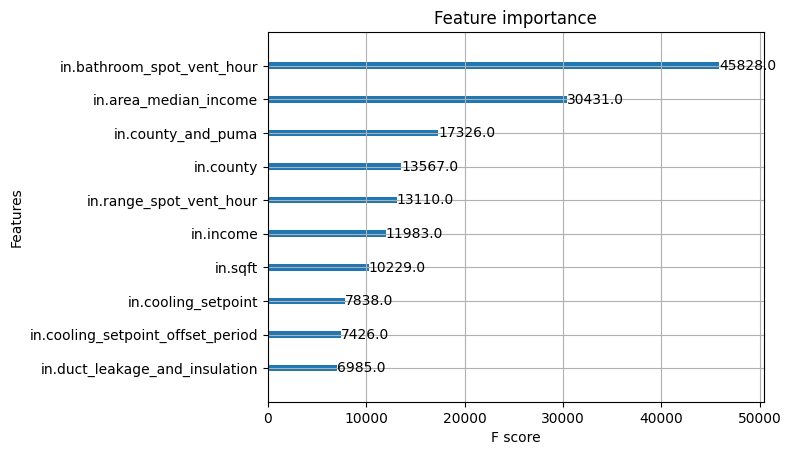

In [25]:
from xgboost import plot_importance
plot_importance(model, max_num_features=10) # top 10 most important features

In [26]:
booster = model.get_booster()
booster.save_model('model_baseline_alabama.json')

In [43]:
data_dict_df = pd.read_csv('data_dictionary.csv', sep='\t').iloc[:, :6].set_index('field_name')
data_dict_df['allowable_enumerations_baseline'] = data_dict_df['allowable_enumerations_baseline'].str.split('|')
# data_dict_df = data_dict_df.replace({"NaN": np.nan})

# Convert the DataFrame to JSON
json_data = data_dict_df.to_json(orient='index')

# Optionally, save the JSON data to a file
with open('data_dictionary.json', 'w') as json_file:
    json_file.write(json_data)

data_dict_df

,field_location,data_type,units,field_description,allowable_enumerations_baseline
field_name,,,,,
in.ahs_region,metadata,string,NaN,American Housing Survey region,"[CBSA Atlanta-Sandy Springs-Roswell, GA, CBSA ..."
in.ashrae_iecc_climate_zone_2004,metadata,string,NaN,IECC climate zone,"[1A, 2A, 2B, 3A, 3B, 3C, 4A, 4B, 4C, 5A, 5B, 6..."
in.ashrae_iecc_climate_zone_2004_2_a_split,metadata,string,NaN,IECC climate zone with split region 2A,"[1A, 2A - FL, GA, AL, MS, 2A - TX, LA, 2B, 3A,..."
in.bathroom_spot_vent_hour,metadata,string,NaN,Bathroom spot ventilation daily start hour,"[Hour0, Hour1, Hour10, Hour11, Hour12, Hour13,..."
in.bedrooms,metadata,integer,NaN,Number of bedrooms,"[1, 2, 3, 4, 5]"
...,...,...,...,...,...
out.propane.total.energy_consumption_intensity,timeseries,float,kWh/sqft,Site total propane energy consumed relative to...,NaN
out.site_energy.net.energy_consumption,timeseries,float,kWh,Total site energy consumption minus on-site en...,NaN
out.site_energy.net.energy_consumption_intensity,timeseries,float,kWh/sqft,Total site energy consumption minus on-site en...,NaN


In [36]:
data_dict_df.describe()

,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
